# Recurrent Neural Network Example

## Predicting Google Stock Price With Historic Stock 'Open' Prices

This exercise applies a Recurrent Neural Networks (RNN) and LSTMS using Tensorflow/Keras to predict future stock prices.

#### Import Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


#### Import Training Dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2]

#### Scale Features of Training Dataset

In [3]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#### Creating a Data Structure with 60 Timesteps and 1 Ouptut

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Reshape Data to 3D Tensor As Required for Keras (Batch dimension equals 1 and is not used here, but can be)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

#### Building The Recurrent Neural Network

In [6]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Fit the Recurrent Neural Network to the Training Dataset

In [7]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0519
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0046
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0039
Epoch 12/10

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 93/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 94/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014


#### Get The "Real" Stock Prices of 2017 (For Testing/Evaluating our Model)

In [9]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### Getting Predicted Stock Price of 2017

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Visualizing 2017 Google Stock Price Prediction Results

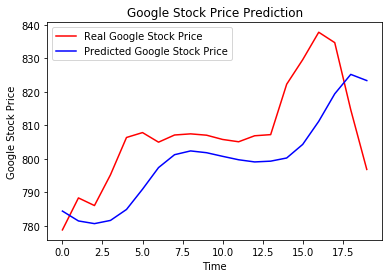

In [12]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()